In [11]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
from openfisca_france.tests.base import tax_benefit_system

In [3]:
from datetime import date  # module nécessaire pour la définition des dates, dont notamment les dates de naissances
from openfisca_france.tests.base import tax_benefit_system




def make_couple_with_child_scenario(nombre_enfants = 0, year = None, tax_benefit_system = tax_benefit_system,
                                    axes_variable = 'salaire_de_base',  ax_variable_max = 150000, count = 5000):
    enfant = [dict(
        birth = date(2005, 1, 1),
        )]
    enfants = enfant * nombre_enfants
    scenario = tax_benefit_system.new_scenario().init_single_entity(
        axes = [[
            dict(
                count = count,
                min = 0,
                max = ax_variable_max,
                name = axes_variable,
                period = year-2,
                ),
            dict(
                count = count,
                min = 0,
                max = ax_variable_max,
                name = axes_variable,
                period = year-1,
                ),
            dict(
                count = count,
                min = 0,
                max = ax_variable_max,
                name = axes_variable,
                period = year,
                ),
            ]],
        period = year,
        parent1 = dict(
            birth = date(1980, 1, 1),
            statmarit = 5, #pacsés
            ),
        parent2 = dict(
            birth = date(1980, 1, 1),
            statmarit = 5,
            ),
        enfants = enfants,
        menage = dict(
            loyer = 1000,
            statut_occupation = 4,
            ),
        )
    return scenario
def make_single_with_child_scenario(nombre_enfants = 0, year = None, tax_benefit_system = tax_benefit_system,
                                    axes_variable = 'salaire_de_base',  ax_variable_max = 150000, count = 5000):
    enfant = [dict(
        birth = date(2005, 1, 1),
        )]
    enfants = enfant * nombre_enfants
    scenario = tax_benefit_system.new_scenario().init_single_entity(
        axes = [[
            dict(
                count = count,
                min = 0,
                max = ax_variable_max,
                name = axes_variable,
                period = year-2,
                ),
            dict(
                count = count,
                min = 0,
                max = ax_variable_max,
                name = axes_variable,
                period = year-1,
                ),
            dict(
                count = count,
                min = 0,
                max = ax_variable_max,
                name = axes_variable,
                period = year,
                ),
            ]],
        period = year,
        parent1 = dict(
            birth = date(1980, 1, 1),
            ),
        enfants = enfants,
        menage = dict(
            loyer = 1000,
            statut_occupation = 4,
            ),
        )
    return scenario

In [50]:
scenario_couple_sans_enfants = make_couple_with_child_scenario(0, 2014)

In [5]:
simulation_couple_sans_enfants = scenario_couple_sans_enfants.new_simulation()

In [16]:
salaire_net = simulation_couple_sans_enfants.calculate_add("salaire_net")
salaire_de_base = simulation_couple_sans_enfants.calculate_add("salaire_de_base")

In [7]:
revenu_disponible = simulation_couple_sans_enfants.calculate_add("revdisp")

In [1]:
import matplotlib.pyplot as plt

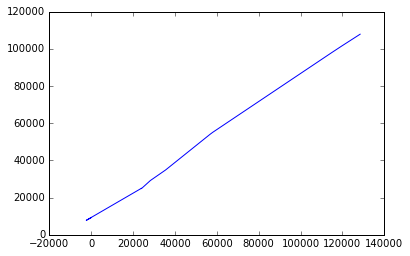

In [12]:
plt.plot(salaire_net[::2],
        revenu_disponible)

In [15]:
from openfisca_core import rates

In [27]:
taux_marginal = rates.marginal_rate(revenu_disponible, salaire_de_base[::2])

(0, 150000)

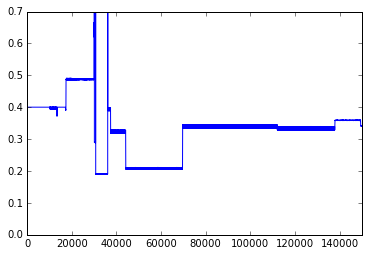

In [39]:
plt.plot(salaire_de_base[2::2],
        taux_marginal)
plt.ylim(0,0.7)
plt.xlim(0,150000)